# Example 29 - Unconformable Dipping Layers

This example will show how to convert the geological map below using ``GemGIS`` to a `GemPy` model. This example is based on digitized data. The area is 1134 m wide (W-E extent) and 788 m high (N-S extent). The vertical model extents varies between 0 m and 600 m. The model represents two unconformable dipping planar stratigraphic units (blue and red) above an unspecified basement (yellow). The map has been georeferenced with QGIS. The stratigraphic boundaries were digitized in QGIS. Strikes lines were digitized in QGIS as well and were used to calculate orientations for the `GemPy` model. These will be loaded into the model directly. The contour lines were also digitized and will be interpolated with `GemGIS` to create a topography for the model. 

Map Source: Unknown

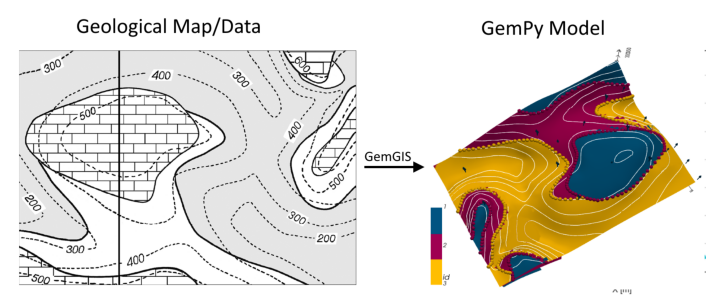

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../images/cover_example29.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

## Licensing

Computational Geosciences and Reservoir Engineering, RWTH Aachen University, Authors: Alexander Juestel. For more information contact: alexander.juestel(at)rwth-aachen.de


This work is licensed under a Creative Commons Attribution 4.0 International License (http://creativecommons.org/licenses/by/4.0/)

## Import GemGIS

If you have installed ``GemGIS`` via pip or conda, you can import ``GemGIS`` like any other package. If you have downloaded the repository, append the path to the directory where the ``GemGIS`` repository is stored and then import ``GemGIS``. 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import gemgis as gg

## Importing Libraries and loading Data

All remaining packages can be loaded in order to prepare the data and to construct the model. The example data is downloaded from an external server using `pooch`. It will be stored in a data folder in the same directory where this notebook is stored.  

In [3]:
import geopandas as gpd
import rasterio

In [4]:
file_path = '../data/example29/'
gg.download_gemgis_data.download_tutorial_data(filename="example29_unconformable_layers.zip", dirpath=file_path)

## Creating Digital Elevation Model from Contour Lines

The digital elevation model (DEM) will be created by interpolating contour lines digitized from the georeferenced map using the `SciPy` Radial Basis Function interpolation wrapped in `GemGIS`. The respective function used for that is `gg.vector.interpolate_raster()`. 

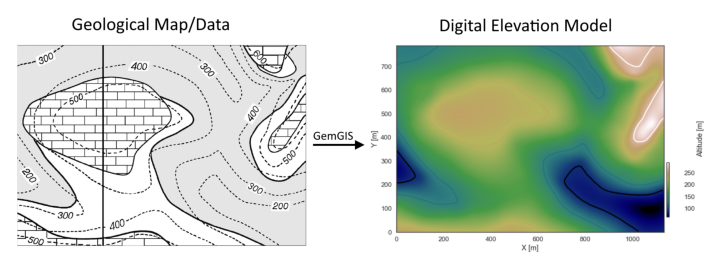

In [5]:
img = mpimg.imread('../images/dem_example29.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [6]:
topo = gpd.read_file(file_path + 'topo29.shp')
topo['Z'] = topo['Z']*0.444
topo.head()

,id,Z,geometry
0,None,222.00,"LINESTRING (2.578 40.099, 33.282 34.251, 75.92..."
1,None,177.60,"LINESTRING (4.771 101.995, 41.324 85.912, 71.5..."
2,None,88.80,"LINESTRING (1.603 344.217, 17.199 324.235, 33...."
3,None,133.20,"LINESTRING (3.065 159.017, 29.140 156.580, 57...."
4,None,88.80,"LINESTRING (1026.294 2.328, 1000.220 20.117, 9..."


### Interpolating the contour lines

In [7]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=5)

### Plotting the raster

(0.0, 788.0)

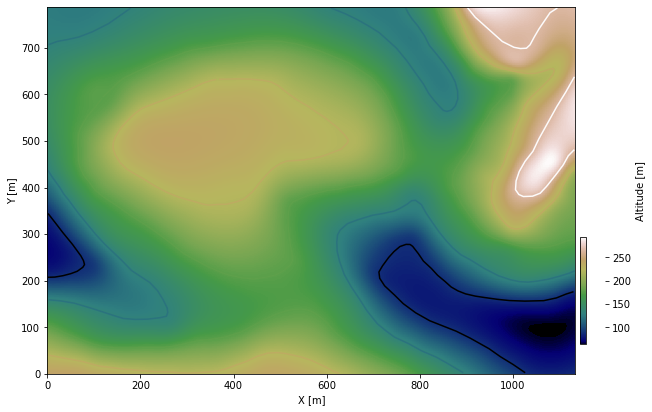

In [8]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, figsize=(10, 10))
topo.plot(ax=ax, aspect='equal', column='Z', cmap='gist_earth')
im = ax.imshow(topo_raster, origin='lower', extent=[0, 1134, 0, 788], cmap='gist_earth')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Altitude [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
plt.xlim(0, 1134)
plt.ylim(0, 788)

### Saving the raster to disc

After the interpolation of the contour lines, the raster is saved to disc using `gg.raster.save_as_tiff()`. The function will not be executed as a raster is already provided with the example data. 

### Opening Raster

The previously computed and saved raster can now be opened using rasterio. 

In [9]:
topo_raster = rasterio.open(file_path + 'raster29.tif')

## Interface Points of stratigraphic boundaries

The interface points will be extracted from LineStrings digitized from the georeferenced map using QGIS. It is important to provide a formation name for each layer boundary. The vertical position of the interface point will be extracted from the digital elevation model using the `GemGIS` function `gg.vector.extract_xyz()`. The resulting GeoDataFrame now contains single points including the information about the respective formation. 

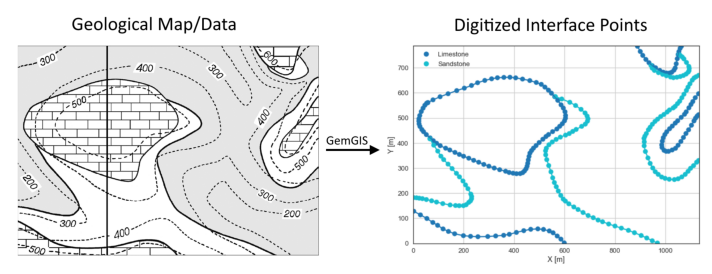

In [10]:
img = mpimg.imread('../images/interfaces_example29.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [11]:
interfaces = gpd.read_file(file_path + 'interfaces29.shp')
interfaces.head()

,id,formation,geometry
0,None,Limestone,"LINESTRING (1.725 128.313, 28.287 113.692, 53...."
1,None,Limestone,"LINESTRING (58.016 561.339, 78.120 572.061, 10..."
2,None,Sandstone,"LINESTRING (65.692 416.834, 81.044 391.613, 97..."
3,None,Sandstone,"LINESTRING (563.660 585.098, 588.760 575.595, ..."
4,None,Limestone,"LINESTRING (888.978 785.650, 900.188 764.937, ..."


### Extracting Z coordinate from Digital Elevation Model

In [12]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=topo_raster)
interfaces_coords

,formation,geometry,X,Y,Z
0,Limestone,POINT (1.725 128.313),1.73,128.31,161.10
1,Limestone,POINT (28.287 113.692),28.29,113.69,166.12
2,Limestone,POINT (53.873 99.314),53.87,99.31,167.68
3,Limestone,POINT (77.511 83.475),77.51,83.47,170.08
4,Limestone,POINT (96.518 72.022),96.52,72.02,171.47
...,...,...,...,...,...
300,Sandstone,POINT (1089.774 287.316),1089.77,287.32,181.40
301,Sandstone,POINT (1099.521 299.257),1099.52,299.26,184.35
302,Sandstone,POINT (1111.462 309.979),1111.46,309.98,185.01
303,Sandstone,POINT (1123.646 323.382),1123.65,323.38,185.75


### Plotting the Interface Points

(0.0, 788.0)

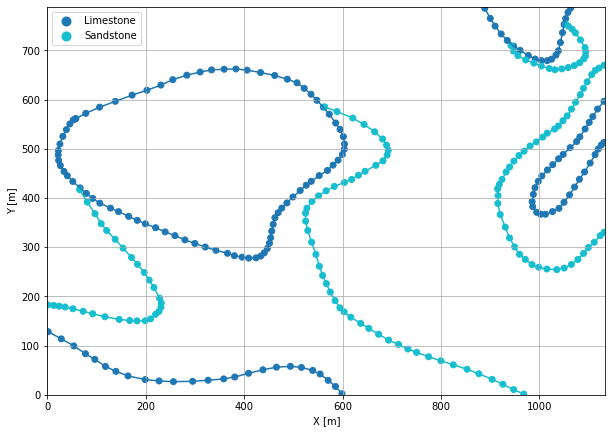

In [13]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.xlim(0, 1134)
plt.ylim(0, 788)

## Orientations from Strike Lines

Strike lines connect outcropping stratigraphic boundaries (interfaces) of the same altitude. In other words: the intersections between topographic contours and stratigraphic boundaries at the surface. The height difference and the horizontal difference between two digitized lines is used to calculate the dip and azimuth and hence an orientation that is necessary for `GemPy`. In order to calculate the orientations, each set of strikes lines/LineStrings for one formation must be given an id number next to the altitude of the strike line. The id field is already predefined in QGIS. The strike line with the lowest altitude gets the id number `1`, the strike line with the highest altitude the the number according to the number of digitized strike lines. It is currently recommended to use one set of strike lines for each structural element of one formation as illustrated. 


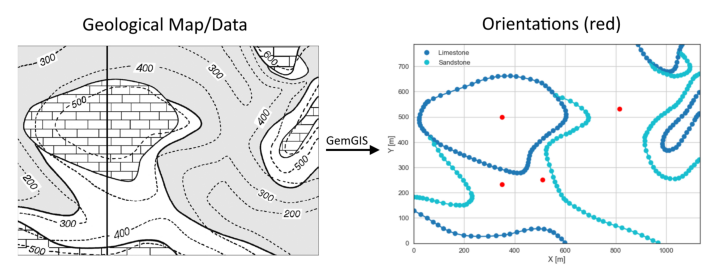

In [14]:
img = mpimg.imread('../images/orientations_example29.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [15]:
strikes = gpd.read_file(file_path + 'strikes29.shp')
strikes['Z'] = strikes['Z']*0.444
strikes

,id,formation,Z,geometry
0,2,Limestone1,222.00,"LINESTRING (583.886 556.100, 583.642 468.861)"
1,1,Limestone1,177.60,"LINESTRING (113.820 587.535, 114.063 385.521)"
2,1,Sandstone,133.20,"LINESTRING (231.032 183.507, 721.080 98.461)"
3,2,Sandstone,177.60,"LINESTRING (1073.935 271.964, 16.346 453.265)"
4,1,Limestone2,177.60,"LINESTRING (114.063 385.521, 115.647 58.375)"
5,2,Limestone2,222.00,"LINESTRING (584.008 468.252, 583.033 21.823)"
6,3,Limestone1,266.40,"LINESTRING (1041.890 715.835, 1046.764 383.206)"


### Calculating Orientations for each formation

In [16]:
orientations_limestone1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'Limestone1'].sort_values(by='id', ascending=True).reset_index())
orientations_limestone1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,5.40,269.97,199.80,POINT (348.853 499.504),1.00,Limestone1,348.85,499.50
1,5.51,269.22,244.20,POINT (814.046 531.000),1.00,Limestone1,814.05,531.00


In [17]:
orientations_limestone2 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'Limestone2'].sort_values(by='id', ascending=True).reset_index())
orientations_limestone2

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,5.43,269.98,199.80,POINT (349.188 233.493),1.00,Limestone2,349.19,233.49


In [18]:
orientations_sandstone = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'Sandstone'].sort_values(by='id', ascending=True).reset_index())
orientations_sandstone

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,10.94,189.75,155.40,POINT (510.598 251.799),1.00,Sandstone,510.60,251.80


### Merging Orientations

In [19]:
import pandas as pd
orientations = pd.concat([orientations_limestone1, orientations_limestone2, orientations_sandstone]).reset_index()
orientations['formation'] = ['Limestone', 'Limestone', 'Limestone', 'Sandstone']

orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,5.40,269.97,199.80,POINT (348.853 499.504),1.00,Limestone,348.85,499.50
1,1,5.51,269.22,244.20,POINT (814.046 531.000),1.00,Limestone,814.05,531.00
2,0,5.43,269.98,199.80,POINT (349.188 233.493),1.00,Limestone,349.19,233.49
3,0,10.94,189.75,155.40,POINT (510.598 251.799),1.00,Sandstone,510.60,251.80


### Plotting the Orientations

(0.0, 788.0)

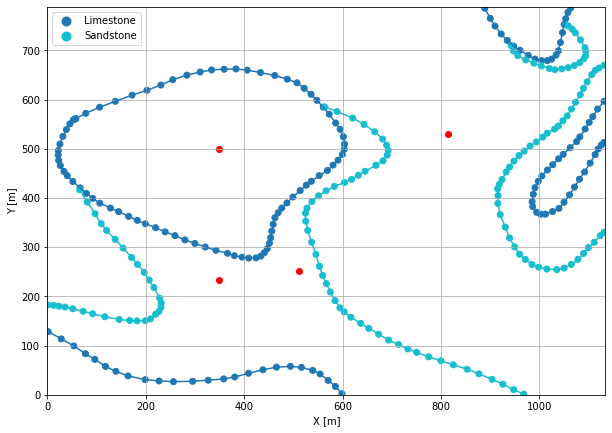

In [20]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
orientations.plot(ax=ax, color='red', aspect='equal')
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.xlim(0, 1134)
plt.ylim(0, 788)

In [21]:
orientations.is_valid

0    True
1    True
2    True
3    True
dtype: bool

## GemPy Model Construction

The structural geological model will be constructed using the `GemPy` package. 

In [22]:
import gempy as gp

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Creating new Model

In [23]:
geo_model = gp.create_model('Model29')
geo_model

Model29  2022-04-16 16:39

### Initiate Data

In [24]:
gp.init_data(geo_model, [0, 1134, 0, 788, 0, 600], [50,50,50],
             surface_points_df=interfaces_coords,
             orientations_df=orientations,
             default_values=True)

Active grids: ['regular']


Model29  2022-04-16 16:39

### Model Surfaces

In [25]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Limestone,Default series,1,#015482,1
1,Sandstone,Default series,2,#9f0052,2


### Mapping the Stack to Surfaces

In [26]:
gp.map_stack_to_surfaces(geo_model,
                         {'Strata1': ('Limestone'),
                          'Strata2': ('Sandstone')
                          },
                         remove_unused_series=True)
geo_model.add_surfaces('Claystone')

,surface,series,order_surfaces,color,id
0,Limestone,Strata1,1,#015482,1
1,Sandstone,Strata2,1,#9f0052,2
2,Claystone,Strata2,2,#ffbe00,3


### Adding additional Orientations

In [27]:
geo_model.add_orientations(X=50, Y=600, Z=300, surface='Limestone', orientation = [270,5.5,1])
geo_model.add_orientations(X=50, Y=700, Z=300, surface='Limestone', orientation = [270,5.5,1])
geo_model.add_orientations(X=50, Y=800, Z=300, surface='Limestone', orientation = [270,5.5,1])

geo_model.add_orientations(X=100, Y=200, Z=300, surface='Limestone', orientation = [270,5.5,1])
geo_model.add_orientations(X=100, Y=400, Z=300, surface='Limestone', orientation = [270,5.5,1])
geo_model.add_orientations(X=100, Y=600, Z=300, surface='Limestone', orientation = [270,5.5,1])

geo_model.add_orientations(X=200, Y=200, Z=300, surface='Limestone', orientation = [270,5.5,1])
geo_model.add_orientations(X=200, Y=400, Z=300, surface='Limestone', orientation = [270,5.5,1])
geo_model.add_orientations(X=200, Y=600, Z=300, surface='Limestone', orientation = [270,5.5,1])

geo_model.add_orientations(X=600, Y=200, Z=300, surface='Limestone', orientation = [270,5.5,1])
geo_model.add_orientations(X=600, Y=400, Z=300, surface='Limestone', orientation = [270,5.5,1])
geo_model.add_orientations(X=600, Y=600, Z=300, surface='Limestone', orientation = [270,5.5,1])

geo_model.add_orientations(X=1000, Y=200, Z=300, surface='Limestone', orientation = [270,5.5,1])
geo_model.add_orientations(X=1000, Y=400, Z=300, surface='Limestone', orientation = [270,5.5,1])
geo_model.add_orientations(X=1000, Y=600, Z=300, surface='Limestone', orientation = [270,5.5,1])

geo_model.add_orientations(X=200, Y=200, Z=300, surface='Sandstone', orientation = [190,11,1])
geo_model.add_orientations(X=200, Y=400, Z=300, surface='Sandstone', orientation = [190,11,1])
geo_model.add_orientations(X=200, Y=600, Z=300, surface='Sandstone', orientation = [190,11,1])

geo_model.add_orientations(X=600, Y=200, Z=300, surface='Sandstone', orientation = [190,11,1])
geo_model.add_orientations(X=600, Y=400, Z=300, surface='Sandstone', orientation = [190,11,1])
geo_model.add_orientations(X=600, Y=600, Z=300, surface='Sandstone', orientation = [190,11,1])

geo_model.add_orientations(X=1000, Y=200, Z=300, surface='Sandstone', orientation = [190,11,1])
geo_model.add_orientations(X=1000, Y=400, Z=300, surface='Sandstone', orientation = [190,11,1])
geo_model.add_orientations(X=1000, Y=600, Z=300, surface='Sandstone', orientation = [190,11,1])



,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,348.85,499.50,199.80,-0.09,-0.00,1.00,0.01,Limestone
1,814.05,531.00,244.20,-0.10,-0.00,1.00,0.01,Limestone
2,349.19,233.49,199.80,-0.09,-0.00,1.00,0.01,Limestone
4,50.00,600.00,300.00,-0.10,0.00,1.00,0.01,Limestone
5,50.00,700.00,300.00,-0.10,0.00,1.00,0.01,Limestone
6,50.00,800.00,300.00,-0.10,0.00,1.00,0.01,Limestone
7,100.00,200.00,300.00,-0.10,0.00,1.00,0.01,Limestone
8,100.00,400.00,300.00,-0.10,0.00,1.00,0.01,Limestone
9,100.00,600.00,300.00,-0.10,0.00,1.00,0.01,Limestone
10,200.00,200.00,300.00,-0.10,0.00,1.00,0.01,Limestone


(0.0, 788.0)

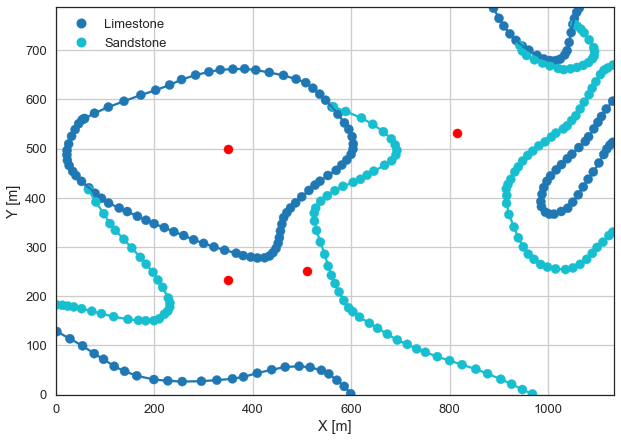

In [28]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
orientations.plot(ax=ax, color='red', aspect='equal')
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.xlim(0, 1134)
plt.ylim(0, 788)

### Showing the Number of Data Points

In [29]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
0,Limestone,Strata1,1,#015482,1,160,18
1,Sandstone,Strata2,1,#9f0052,2,145,10
2,Claystone,Strata2,2,#ffbe00,3,0,0


### Loading Digital Elevation Model

In [30]:
geo_model.set_topography(source='gdal', filepath=file_path + 'raster29.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  11.34      ,    7.88      ,    6.        ],
       [  11.34      ,    7.88      ,   18.        ],
       [  11.34      ,    7.88      ,   30.        ],
       ...,
       [1131.50220264,  775.53164557,  266.35290527],
       [1131.50220264,  780.51898734,  267.26382446],
       [1131.50220264,  785.50632911,  268.18728638]])

### Plotting Input Data

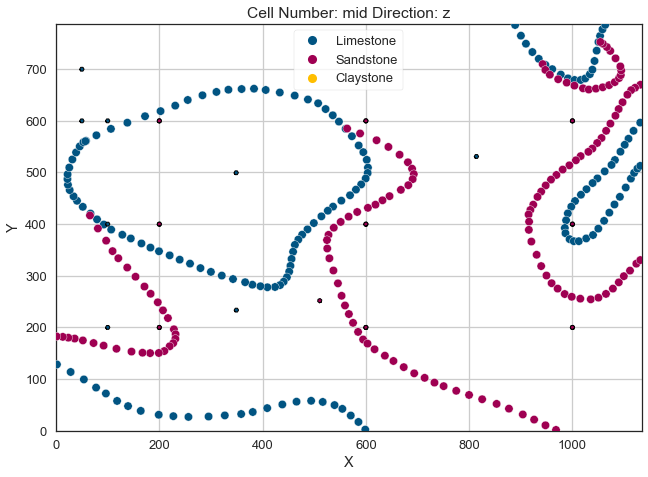

In [31]:
gp.plot_2d(geo_model, direction='z', show_lith=False, show_boundaries=False)
plt.grid()

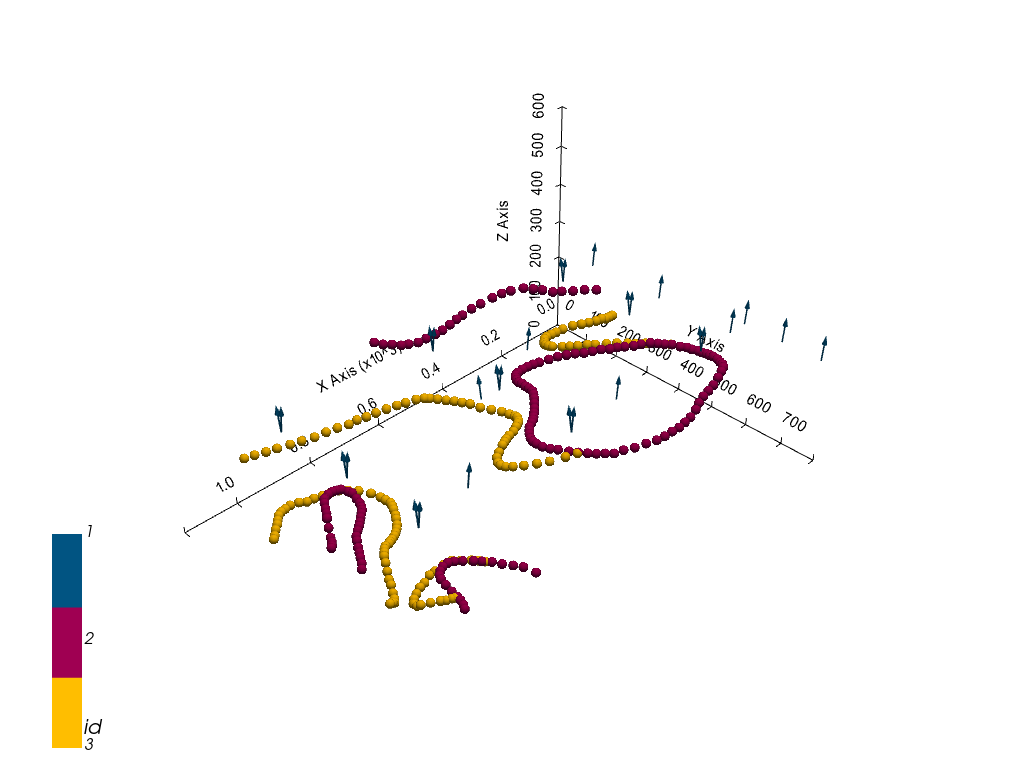

In [32]:
gp.plot_3d(geo_model, image=False, plotter_type='basic', notebook=True)

### Setting the Interpolator

In [33]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging=False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1505.62
$C_o$           53973.81
drift equations   [3, 3]


### Computing Model

In [34]:
sol = gp.compute_model(geo_model, compute_mesh=True)

### Plotting Cross Sections

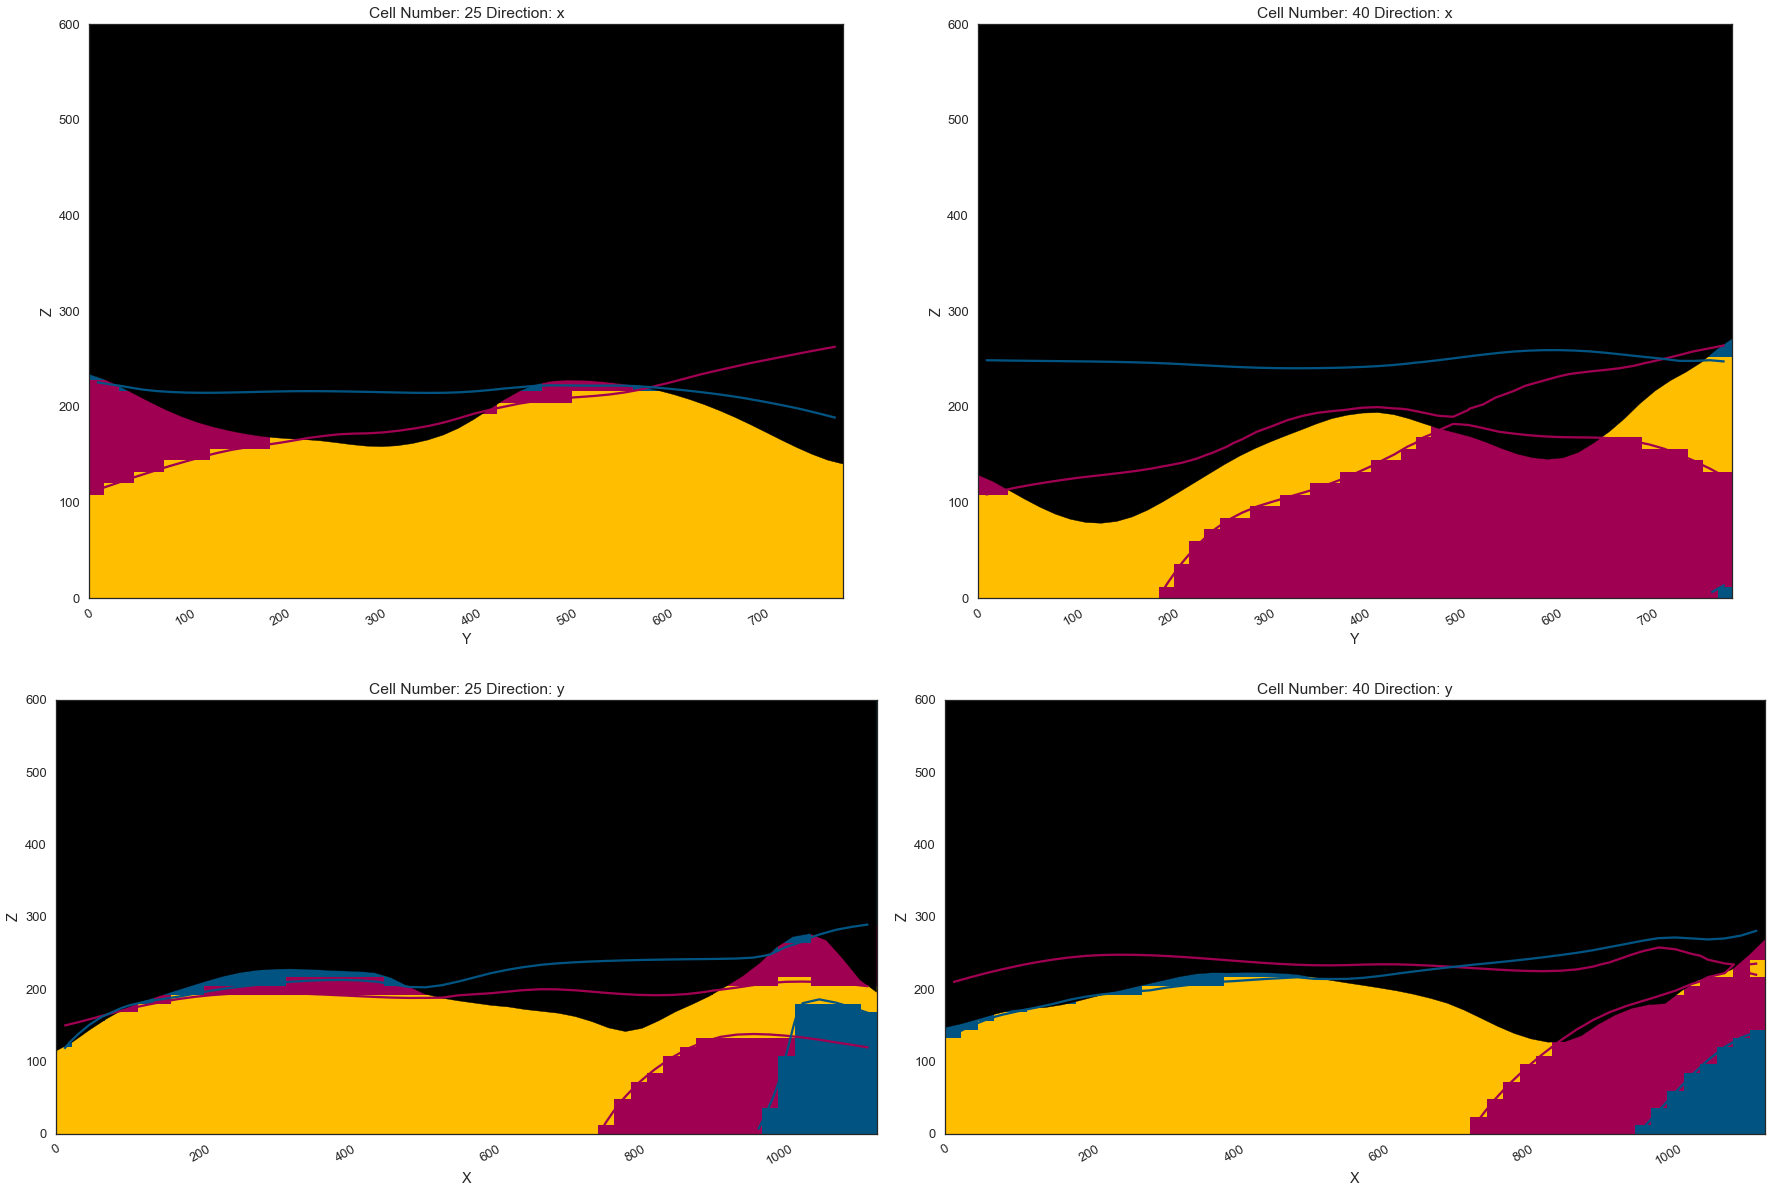

In [35]:
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 40, 25, 40], show_topography=True, show_data=False)

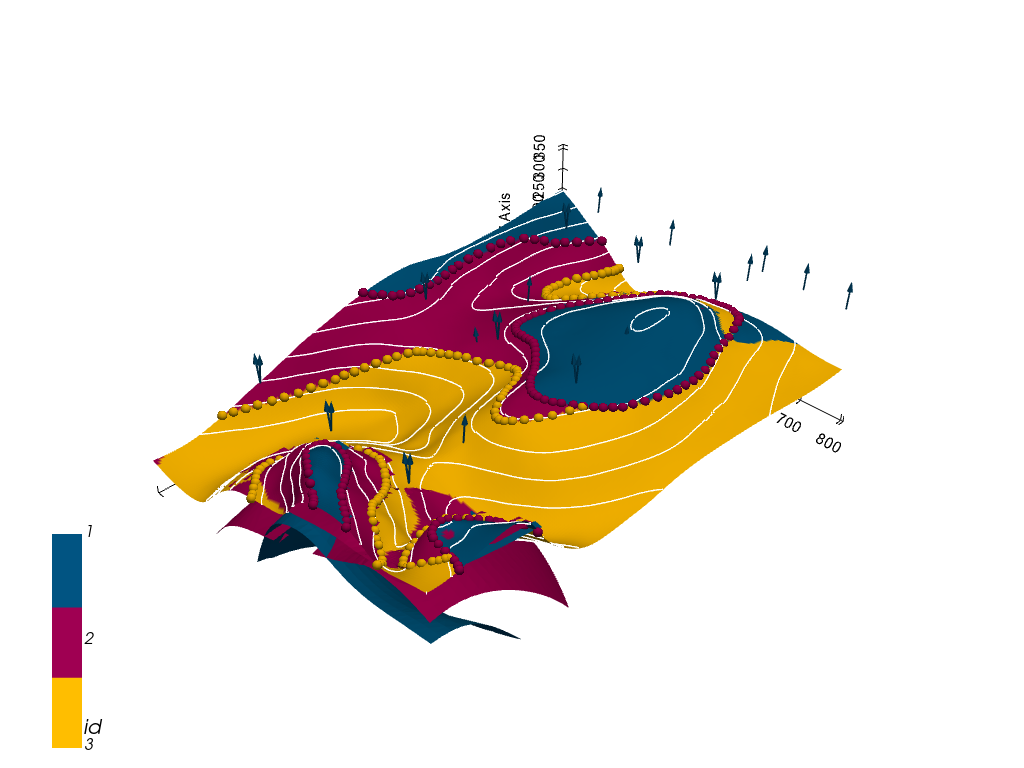

In [36]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=False)